# Projet Datascientest - Compagnon immo

<code>mar25_bds_compagnon_immo_1</code>


---

## Modélisation évolution des prix - v1.0

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# dump / load
import joblib

In [3]:
dvf_df = pd.read_csv('../data/processed/dvf_data_merged_transformed.csv.gz', index_col='date_mutation', parse_dates=True)

display(dvf_df.head())

display(dvf_df.shape)

display(dvf_df.info())

,numero_disposition,nature_mutation,valeur_fonciere,code_commune,code_departement,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,...,nombre_pieces_principales,code_nature_culture,code_nature_culture_speciale,surface_terrain,longitude,latitude,prix_m2_vente,annee,mois,hashed_code_commune
date_mutation,,,,,,,,,,,,,,,,,,,,,
2019-07-01,1,1,244200.0,1053,1,0,150.0,0,0.0,0,...,5.0,0.355449,0.972004,695.0,5.264531,46.194443,1628.000000,2019,7,1053
2019-07-04,1,1,195000.0,1184,1,0,94.0,0,0.0,0,...,4.0,0.017697,0.972004,888.0,5.415689,46.159272,2074.468085,2019,7,1184
2019-07-04,1,1,110030.0,1177,1,0,90.0,0,0.0,0,...,3.0,0.355449,0.972004,522.0,5.431065,46.199271,1222.555556,2019,7,1177
2019-07-03,1,1,160450.0,1108,1,0,0.0,0,0.0,0,...,0.0,0.355449,0.972004,8.0,5.353051,46.384396,20056.250000,2019,7,1108
2019-07-01,1,1,211500.0,1451,1,0,0.0,0,0.0,0,...,0.0,0.033424,0.972004,1574.0,5.252871,46.231001,134.371029,2019,7,1451


(8139377, 29)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8139377 entries, 2019-07-01 to 2019-02-01
Data columns (total 29 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   numero_disposition            int64  
 1   nature_mutation               int64  
 2   valeur_fonciere               float64
 3   code_commune                  int64  
 4   code_departement              int64  
 5   lot1_numero                   int64  
 6   lot1_surface_carrez           float64
 7   lot2_numero                   int64  
 8   lot2_surface_carrez           float64
 9   lot3_numero                   int64  
 10  lot3_surface_carrez           float64
 11  lot4_numero                   int64  
 12  lot4_surface_carrez           float64
 13  lot5_numero                   int64  
 14  lot5_surface_carrez           float64
 15  nombre_lots                   int64  
 16  code_type_local               float64
 17  type_local                    float64
 18  surface

None

In [11]:
dvf_df[dvf_df['code_departement'] == 75]

,numero_disposition,nature_mutation,valeur_fonciere,code_commune,code_departement,lot1_numero,lot1_surface_carrez,lot2_numero,lot2_surface_carrez,lot3_numero,...,nombre_pieces_principales,code_nature_culture,code_nature_culture_speciale,surface_terrain,longitude,latitude,prix_m2_vente,annee,mois,hashed_code_commune
date_mutation,,,,,,,,,,,,,,,,,,,,,
2019-07-03,1,1,315000.0,75103,75,25,195.0,0,0.00,0,...,2.0,0.394142,0.972004,0.0,2.356539,48.861345,1615.384615,2019,7,75103
2019-07-01,1,1,1460000.0,75108,75,52,115.0,65,120.30,0,...,5.0,0.394142,0.972004,0.0,2.313418,48.872688,12695.652174,2019,7,75108
2019-07-02,1,1,425000.0,75101,75,18,52.0,19,44.91,0,...,3.0,0.394142,0.972004,0.0,2.348739,48.863462,8173.076923,2019,7,75101
2019-07-02,1,1,230000.0,75101,75,217,16.0,0,0.00,0,...,1.0,0.394142,0.972004,0.0,2.341817,48.861395,14375.000000,2019,7,75101
2019-07-05,1,1,850000.0,75103,75,2,41.0,4,0.00,0,...,0.0,0.394142,0.972004,0.0,2.362083,48.865994,20731.707317,2019,7,75103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20,1,1,380000.0,75107,75,1,37.0,100,0.00,2,...,2.0,0.394142,0.972004,0.0,2.326632,48.859197,10270.270270,2024,12,75107
2024-12-30,1,1,260000.0,75116,75,138,26.0,0,0.00,0,...,1.0,0.394142,0.972004,0.0,2.260649,48.837985,10000.000000,2024,12,75116
2024-12-30,1,1,604166.7,75111,75,279,0.0,0,0.00,0,...,0.0,0.394142,0.972004,0.0,2.382578,48.851489,0.000000,2024,12,75111


### Valeurs extrêmes / aberrantes

In [9]:
dvf_df = dvf_df[(dvf_df['valeur_fonciere'] > 100) & (dvf_df['valeur_fonciere'] < 100000000)]

dvf_df = dvf_df[dvf_df['prix_m2_vente'] < 1000000]

dvf_df = dvf_df[dvf_df['lot1_numero'] < 1000000]

dvf_df = dvf_df[dvf_df['surface_terrain'] < 1000000]

dvf_df = dvf_df.sort_index()

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> Nous cherchons à modéliser l'évolution d'une variable quantitative au fil du temps, ce qui nécessite l'utilisation de modèles de séries temporelles comme <b>ARIMA</b> ou <b>SARIMA</b>.
</div>

### Analyse de la série temporelle

#### Regroupement par moyenne mensuelle

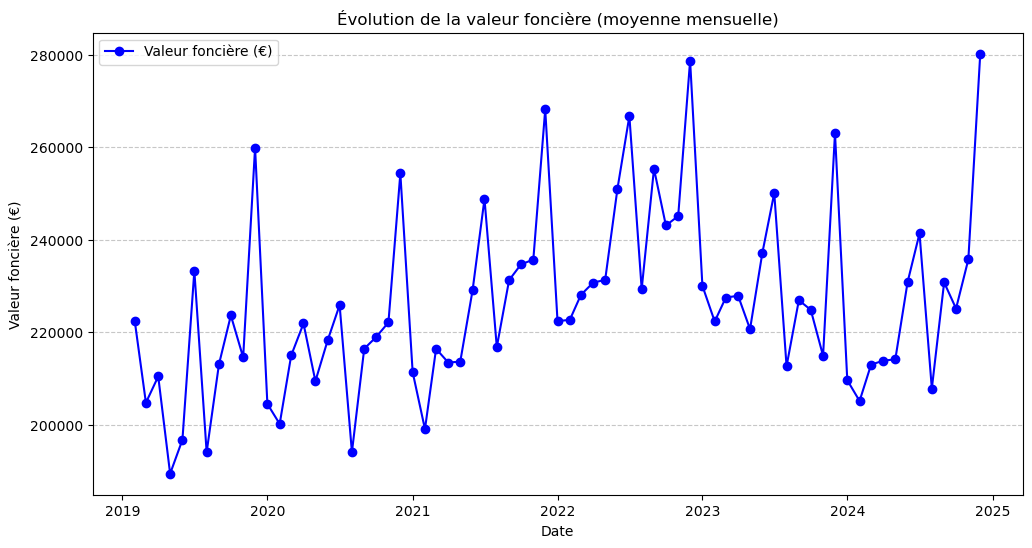

In [185]:
df_monthly = dvf_df.resample('MS').mean()

plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['valeur_fonciere'], color='b', marker='o', label='Valeur foncière (€)')
plt.title("Évolution de la valeur foncière (moyenne mensuelle)")
plt.xlabel("Date")
plt.ylabel("Valeur foncière (€)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show();

> **Vérification série additive**

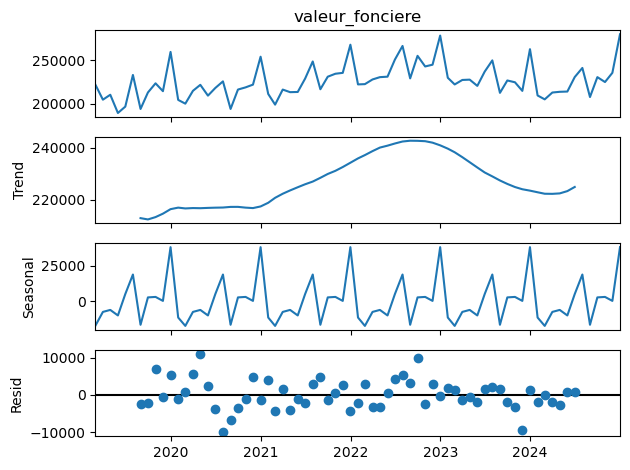

In [143]:
result = seasonal_decompose(df_monthly['valeur_fonciere'], period=12)
result.plot()
plt.show();

> **Vérification série multiplicative**

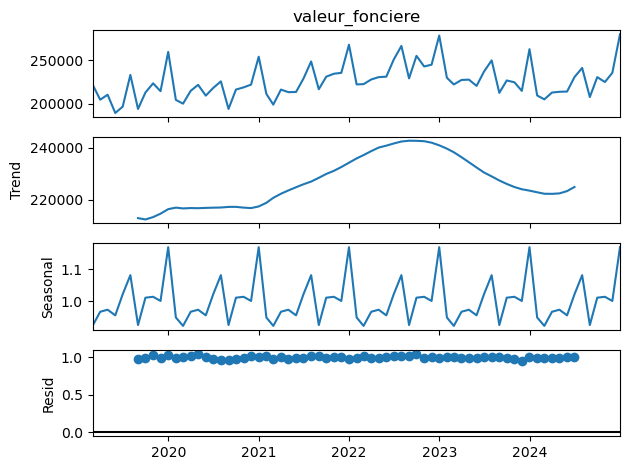

In [145]:
result = seasonal_decompose(df_monthly['valeur_fonciere'], model='multiplicative', period=12)
result.plot()
plt.show();

> **Vérification avec les écarts types**

In [147]:
decomposition_additive = seasonal_decompose(df_monthly['valeur_fonciere'], period=12)
decomposition_multiplicative = seasonal_decompose(df_monthly['valeur_fonciere'], model='multiplicative', period=12)

# Résidus pour les deux modèles
resid_add = decomposition_additive.resid.dropna()
resid_mult = decomposition_multiplicative.resid.dropna()

# Calcul l'écart-type des résidus
std_add = resid_add.std()
std_mult = resid_mult.std()

print(f"Écart-type des résidus (Additif) : {std_add}")
print(f"Écart-type des résidus (Multiplicatif) : {std_mult}")

if std_add < std_mult:
    print("La série est additive.")
else:
    print("La série est multiplicative.")

Écart-type des résidus (Additif) : 3983.8741382064477
Écart-type des résidus (Multiplicatif) : 0.01797525319359973
La série est multiplicative.


<div class="alert alert-info">
<i class="fa fa-info-circle"></i> La série est multiplicative, nous avons besoin d'une transformation logarithmique.
</div>

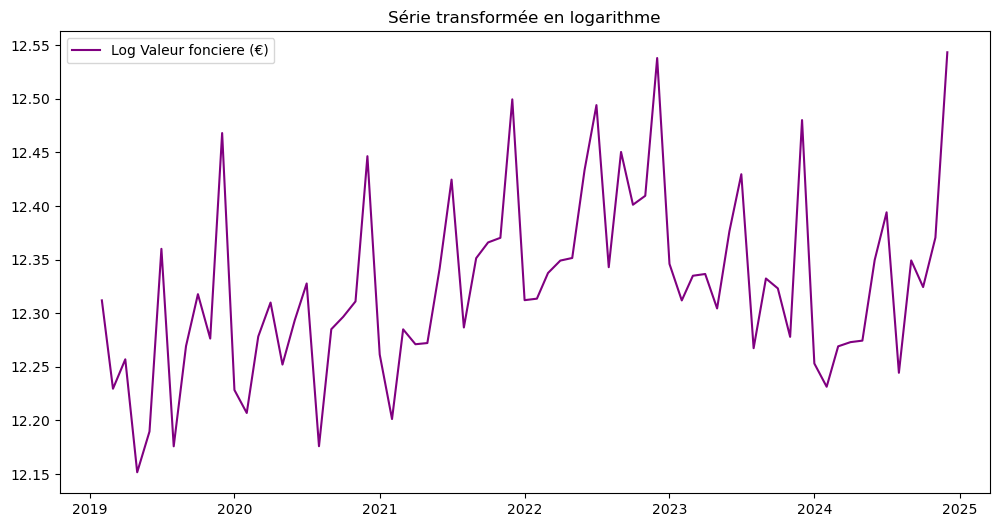

In [187]:
df_monthly['log_valeur_fonciere'] = np.log(df_monthly['valeur_fonciere'])

plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['log_valeur_fonciere'], color='purple', label='Log Valeur fonciere (€)')
plt.title("Série transformée en logarithme")
plt.legend()
plt.show();

### Train Test Split

In [189]:
train = df_monthly[df_monthly['annee'] < 2024]
test = df_monthly[df_monthly['annee'] == 2024]

X_train = train.drop(['valeur_fonciere', 'log_valeur_fonciere'], axis=1)
X_test = test.drop(['valeur_fonciere', 'log_valeur_fonciere'], axis=1)

y_train_log = train['log_valeur_fonciere']
y_test_log = test['log_valeur_fonciere']

### Standardisation / Normalisation

In [191]:
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### Entraînement du modèle

In [193]:
# 1ere approche
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train_log)

LinearRegression()

### Dump

In [195]:
joblib.dump(linreg, "../models/model_regression_lineaire_time_series.pkl")
print("Modèle sauvegardé avec succès.")

Modèle sauvegardé avec succès.


### Evaluation modèles entraînés

In [207]:
y_pred_log = linreg.predict(X_test_scaled)

y_pred = np.exp(y_pred_log)
y_test = np.exp(y_test_log)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

scores = [{"Modèle": "LinearRegression", "MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}]

In [209]:
df_scores = pd.DataFrame(scores)
df_scores

,Modèle,MAE,MSE,RMSE,R²
0,LinearRegression,19545.327001,5.843703e+08,24173.75221,-0.457691


In [211]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 8.35%


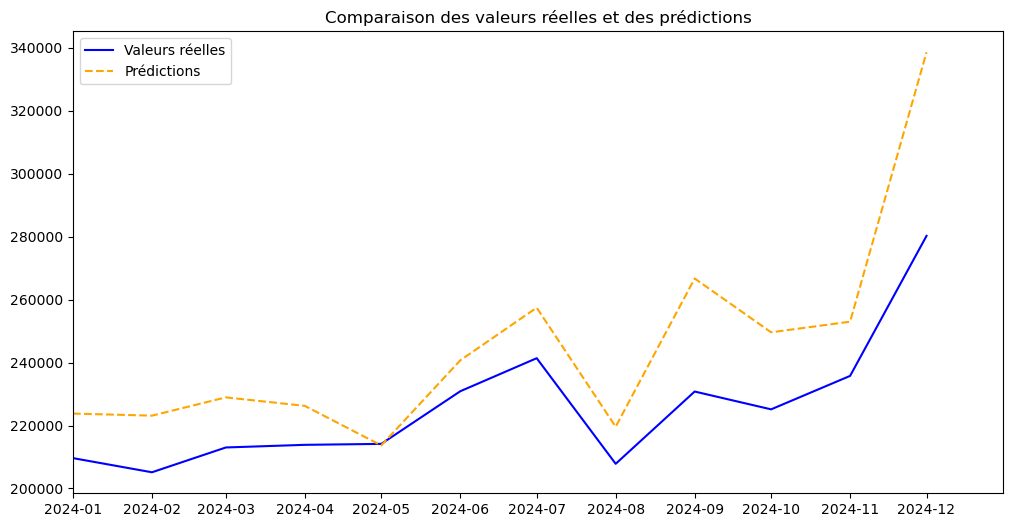

In [199]:
y_pred = pd.Series(y_pred, index=y_test.index)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valeurs réelles', color='blue')
plt.plot(y_pred, label='Prédictions', color='orange', linestyle='--')
plt.title("Comparaison des valeurs réelles et des prédictions")
plt.xlim(pd.Timestamp('2024-01-01'), pd.Timestamp('2024-12-31'))
plt.legend()
plt.show();

#### Regroupement par département

In [44]:
dvf_df['date_mutation'] = pd.to_datetime(dvf_df.index)
df_dep = dvf_df.groupby(['code_departement']).resample('MS').mean()

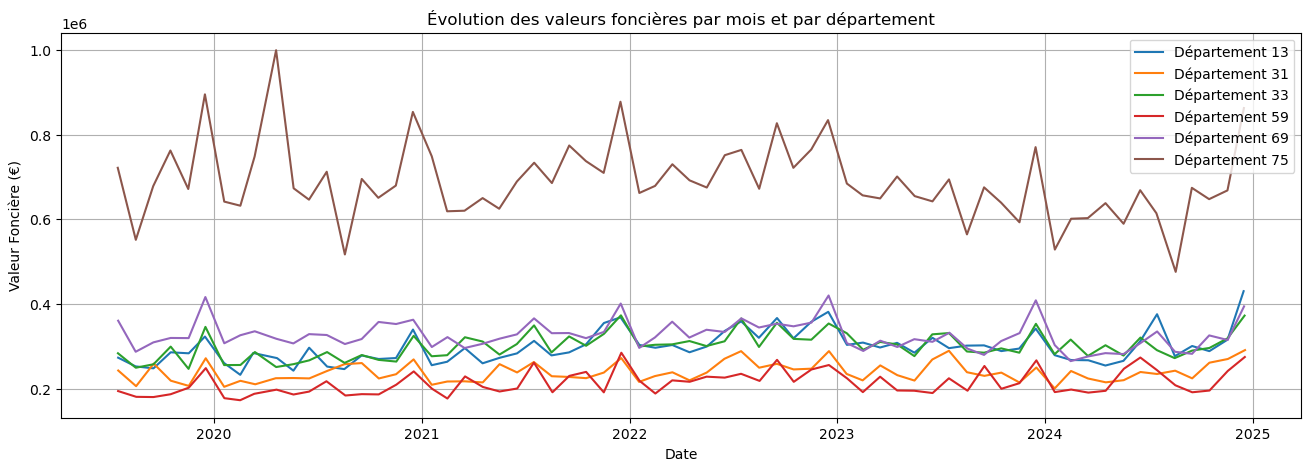

In [46]:
# Visualisation sur les départements les plus peuplés
top_deps = [13, 31, 33, 59, 69, 75]

plt.figure(figsize=(16, 5))
for dep in top_deps:
    dep_data = df_dep[df_dep['code_departement'] == dep]
    plt.plot(dep_data['date_mutation'], dep_data['valeur_fonciere'], label=f"Département {dep}")

plt.title("Évolution des valeurs foncières par mois et par département")
plt.xlabel("Date")
plt.ylabel("Valeur Foncière (€)")
plt.legend()
plt.grid(True)
plt.show();

In [54]:
df_dep = df_dep.drop('date_mutation', axis=1)

df_dep['log_valeur_fonciere'] = np.log(df_dep['valeur_fonciere'])

train = df_dep[df_dep['annee'] < 2024]
test = df_dep[df_dep['annee'] == 2024]

X_train = train.drop(['valeur_fonciere', 'log_valeur_fonciere'], axis=1)
y_train_log = train['log_valeur_fonciere']

X_test = test.drop(['valeur_fonciere', 'log_valeur_fonciere'], axis=1)
y_test_log = test['log_valeur_fonciere']

In [56]:
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [58]:
linreg_dep = LinearRegression()
linreg_dep.fit(X_train_scaled, y_train_log)

LinearRegression()

In [66]:
y_pred_dep_log = linreg_dep.predict(X_test_scaled)

y_pred_dep = np.exp(y_pred_dep_log)
y_test = np.exp(y_test_log)

mae = mean_absolute_error(y_test, y_pred_dep)
mse = mean_squared_error(y_test, y_pred_dep)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dep)

scores_dep = [{"Modèle": "LinearRegression", "MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}]

In [68]:
df_scores_dep = pd.DataFrame(scores_dep)
df_scores_dep

,Modèle,MAE,MSE,RMSE,R²
0,LinearRegression,28255.601287,1.706374e+09,41308.278863,0.842183


In [70]:
mape = np.mean(np.abs((y_test - y_pred_dep) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 17.12%
